In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
scaler = StandardScaler()
# num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#         'BMI', 'DiabetesPedigreeFunction', 'Age']
# diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(diabetes.columns)
cols.insert(0, cols.pop(cols.index('Outcome')))
diabetes = diabetes[cols]

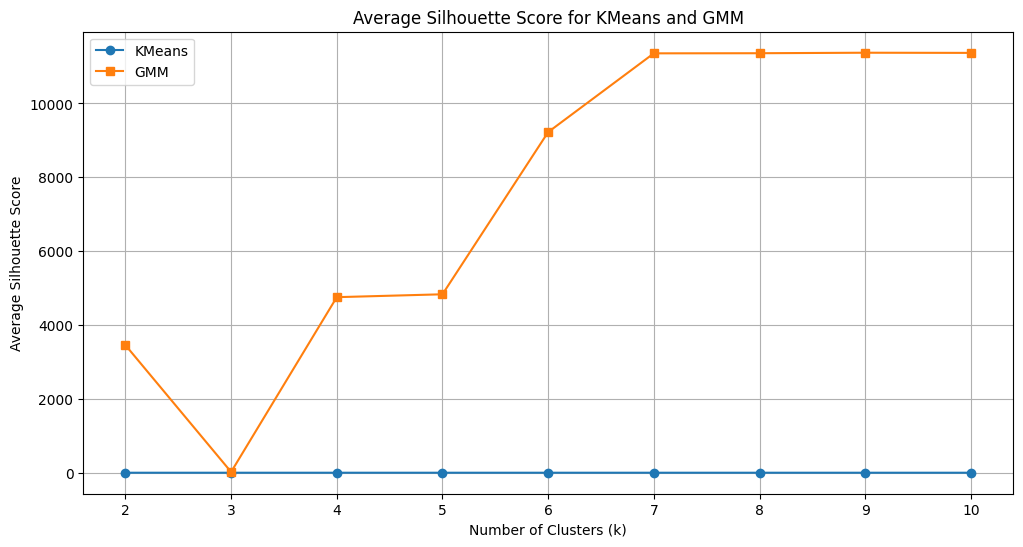

In [5]:
X = diabetes.drop(columns=['Outcome'])  # Assuming 'y' is the target variable
y = diabetes['Outcome']  # If needed for supervised tasks

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def get_average_silhouette_score_kmeans(X, k, seeds):
    scores = []
    for seed in seeds:
        model = KMeans(n_clusters=k, random_state=seed)
        model.fit(X)
        labels = model.predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    average_score = np.mean(scores)
    return average_score

def get_average_silhouette_score_gmm(X, k, seeds):
    scores = []
    for seed in seeds:
        model = GaussianMixture(n_components=k, random_state=seed)
        model.fit(X)
        gmm_scores = model.score_samples(X)
        #labels = model.predict(X)
        score = np.exp(gmm_scores).sum()
        scores.append(score)
    average_score = np.mean(scores)
    return average_score

# gmm.fit(X)
#     gmm_scores = gmm.score_samples(X)
#     score = np.exp(gmm_scores).sum()
#     return score

def find_optimal_k(X, k_values, seeds):
    kmeans_scores = {}
    gmm_scores = {}
    for k in k_values:
        kmeans_score = get_average_silhouette_score_kmeans(X, k, seeds)
        gmm_score = get_average_silhouette_score_gmm(X, k, seeds)
        kmeans_scores[k] = kmeans_score
        gmm_scores[k] = gmm_score
    
    optimal_k_kmeans = max(kmeans_scores, key=kmeans_scores.get)
    optimal_k_gmm = max(gmm_scores, key=gmm_scores.get)
    
    return optimal_k_kmeans, optimal_k_gmm, kmeans_scores, gmm_scores

k_values = range(2, 11)  # Example range of k values
seeds = [0, 42, 100, 200, 300]  # Example list of random seeds

optimal_k_kmeans, optimal_k_gmm, kmeans_scores, gmm_scores = find_optimal_k(X_scaled, k_values, seeds)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(k_values, [kmeans_scores[k] for k in k_values], label='KMeans', marker='o')
plt.plot(k_values, [gmm_scores[k] for k in k_values], label='GMM', marker='s')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score for KMeans and GMM')
plt.legend()
plt.grid(True)
plt.show()

